# Table of Content

## 1. Introduction
- 1.1 Data Description
- 1.2 Objective of this project

## 2. Fetching Data
- 2.1 Import necessary Libraries
- 2.2 Import data

## 3. Exploratory Data Analysis (EDA)
- 3.1 Univariate Analysis
- 3.2 Bivariate Analysis
- 3.3 Multivariate Analysis

## 4. Encoding Dataframe
## 5. Describe the dataset
## 6. Correlation of the features with target column
## 7. Visualizing correlation of feature columns with label column.
## 8. Checking Distribution of data

## 9. Checking Outliers
- 9.1 Removing Outliers
- 9.2 Parcentage of data loss

## 10. Checking Multicollinearity


## 11. Selecting KBest Feature
- 11.1 Data Before removing skewness
- 11.2 Data After Removing Skewness
- 11.3 Balancing the data

## 12. Building Model
- 12.1 Random Forest Classifier
- 12.1.1 Which Accuracy Metric Used? 
- 12.1.2 Cross Validation Fro Random Forest
- 12.2 Gradient Boosting Classifier
- 12.1 Cross Validation For Gradient Boosting Classifier

## 13. ROC_AUC Curve

## 14. Selecting Best Model
## 15. Hyperparameter Tuning

## 16. Model Save
- 16.1 Loading the model
- 16.2 Predicting the class

## 17.Conclusion
## 18. Understanding of business Problem
## 19. Outcomes

# 1. Introduction
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

## 1.1 Data Description
### Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1. A single cell estimate of the population 16+ for each state.

2. Controls for Hispanic Origin by age and sex.

3. Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

## 1.2 Objective of this project
- The goal of this machine learning project is to predict the Income.
- This is the classification problem

# 2. Fetching Data

## 2.1 Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 2.2 Importing dataset

In [2]:
# Importing the data
df = pd.read_csv("adult.data")

In [3]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.shape

(32560, 15)

- We can see in the above data it take first row as column name so we need manage it during importing the data

In [5]:
## Load the data by naming the column name so that it will show in proper way
data = pd.read_csv("adult.data", 
                 names=["Age", "Workclass","Fnlwgt","Education","Education_num","Marital_status","Occupation","Relationship","Race","Sex","Capital_gain","Capital_loss","Hours_per_week","Native_country","Income"])
  
# display DataFrame
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
data.shape

(32561, 15)

- As we seen into the data our dataset contains continuos as well as categorical features.
- Dataset contains 32561 rows and 15 columns including label.

## Droping Duplicates

In [7]:
data.drop_duplicates()
data.shape

(32561, 15)

- No duplicates values are present.

## Checking unique values

In [8]:
data.nunique()

Age                  73
Workclass             9
Fnlwgt            21648
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

- We can see, all features contains some unique values but Fnlwgt has contains maximum unique values because it a continous data.

In [9]:
### Checking Unique values for categorical data
object_describe=data.describe(include=["object"]).T 
object_describe

,count,unique,top,freq
Workclass,32561,9,Private,22696
Education,32561,16,HS-grad,10501
Marital_status,32561,7,Married-civ-spouse,14976
Occupation,32561,15,Prof-specialty,4140
Relationship,32561,6,Husband,13193
Race,32561,5,White,27816
Sex,32561,2,Male,21790
Native_country,32561,42,United-States,29170
Income,32561,2,<=50K,24720


- From above table we can see, categorical data with their unique value and top value with their frequency.


## Checking Null Values

In [10]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

- see there are no null values present in dataset.

In [11]:
## From above we can see, data does not contains any null values 
# but I check object data because some time null values are present in other way
object_columns=data.select_dtypes(include=["object"]).columns # Select object data 
for i in range(len(object_columns)):   # Iterating with loop 
    print("----- {}-----".format(object_columns[i])) # Print the data, 
    print(data[object_columns[i]].value_counts()) 

----- Workclass-----
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
----- Education-----
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
----- Marital_status-----
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64
--

- Null values shows in the form of ? marks. I am considering it as null values.

In [12]:
data=data.replace(" ?",np.nan) # replacing ? mark with np.nan for considering null values

In [13]:
data.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

- See Workclass, Occupation and Native_country contains some null values.

## Filling Missing values

- Acually Workclass, Occupation and Native_country are the categorical data. So I used mode for filling missing values.

In [14]:
null_columns =['Workclass','Occupation','Native_country']
for i in null_columns:
    data.fillna(data[i].mode()[0], inplace=True) # replacing null values with most frequent occuring values

In [15]:
data.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [16]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

- We can see there is no null values present in dataset.

## Checking all information

In [17]:
# Checking data type because sometime data type change while handling missing values.
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_num   32561 non-null  int64 
 5   Marital_status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_gain    32561 non-null  int64 
 11  Capital_loss    32561 non-null  int64 
 12  Hours_per_week  32561 non-null  int64 
 13  Native_country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


- No null value present.
- Datatype is ok with respect to their column.
- Output columns is object datatypes it mean its classification problem.

# 3. EDA
## Visualization of the data
- I am doing some data visualization for finding some insight from data and understanding the feature more.

## 3.1 Univariate Analysis

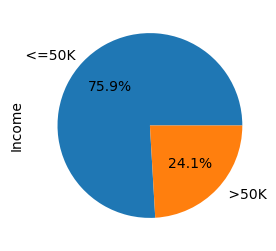

In [18]:
a = data['Income'].value_counts() # count the data of income and store it in variavle "a"
plt.figure(figsize=(3,3)) # figure size
a.plot.pie(autopct="%1.1f%%") # plot pie plot
plt.show()

- We can see, class is imabalnced. so we need to balanced it. I will doing in feature engineering section.
- We can see, 75.9% people have less than 50k income.

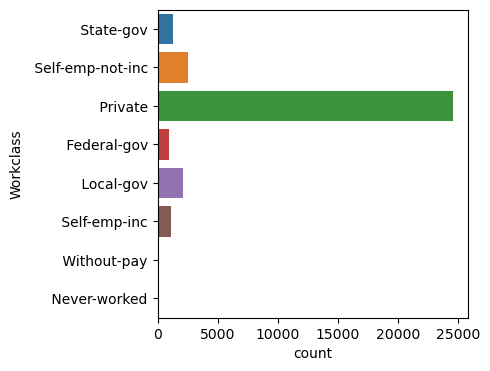

In [19]:
# Using countplot for finding maxium count of categories
plt.figure(figsize=(4,4))
sns.countplot(y='Workclass',data=data) 
plt.show()

- We can see, maximum people are worked in private sector follwed by self-employeed.
- Local govt. also in 3rd postion where people are doing job.
- No one belong to without-pay and Never-worked workclass.

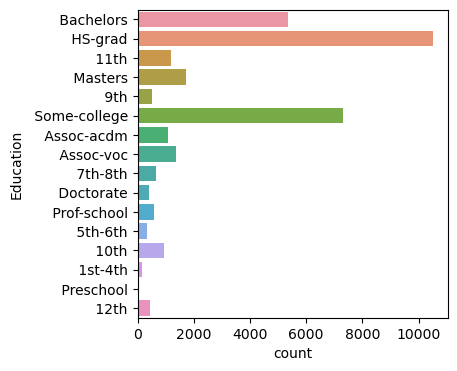

In [20]:
plt.figure(figsize=(4,4))
sns.countplot(y='Education',data=data)
plt.show()

- We can see, HS grade is having maximum education folowed by some-college.
- Pre-School has minimum education almost nill.

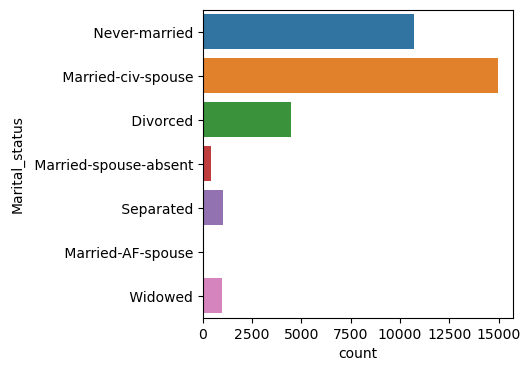

In [21]:
plt.figure(figsize=(4,4))
sns.countplot(y='Marital_status',data=data)
plt.show()

- We can see, maximum people are maried-civ-spouse followed by never married (my be single)

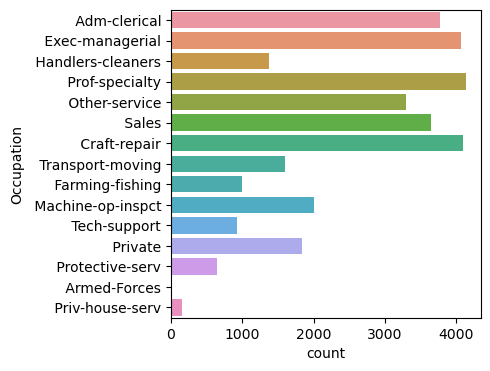

In [22]:
plt.figure(figsize=(4,4))
sns.countplot(y='Occupation',data=data)
plt.show()

- We can see, Maximum people are doing prof-speciality occupation followed craft_repair i.e 12.6%.
- There are only few pople are doing Armed Forece job.

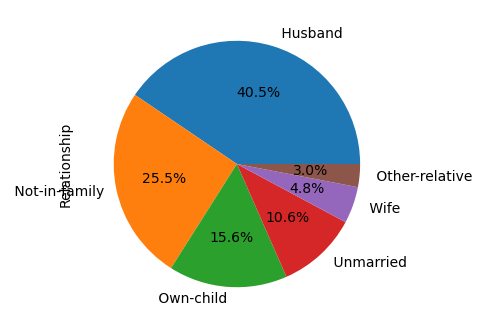

In [23]:
a = data['Relationship'].value_counts()
plt.figure(figsize=(4,4))
a.plot.pie(autopct="%1.1f%%")
plt.show()


- We can see, Husband are more contributing in Growth then wife.
- Wife has 4.8% contributing in income. It means after the marriage women may quite thier job or they not proposed to do job.
- Not in familly has 25.5% chunk.
- Other-relative are having very low contribution.

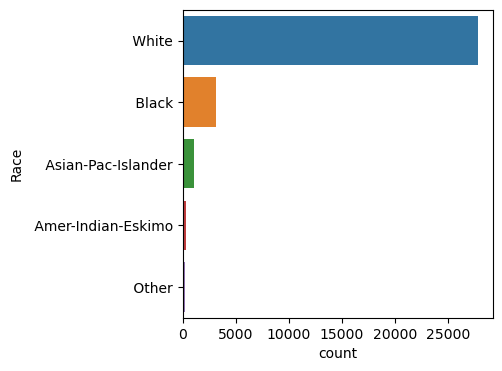

In [24]:
plt.figure(figsize=(4,4))
sns.countplot(y='Race',data=data)
plt.show()

- We can see, White people are more in number followed by Black. It shows that white man doing maximum job than other.
- Others has very low contribution.

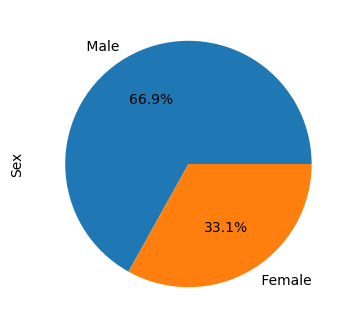

In [25]:
a = data['Sex'].value_counts()
plt.figure(figsize=(4,4))
a.plot.pie(autopct="%1.1f%%")
plt.show()


- We can see, 66.9% male and 33.1% female. I may happens because most in family men are earner and women are housewife.
- Due this it's show imbalanced.

## 3.2 Bivariate Analysis

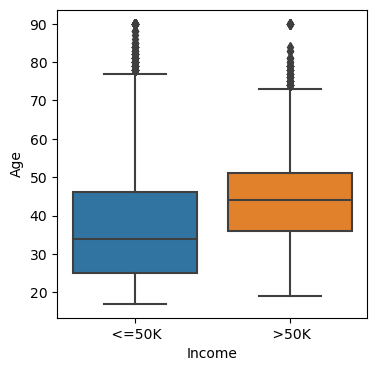

In [26]:
# Comaprision between Income and Age
plt.figure(figsize=(4,4))
sns.boxplot(x="Income", y="Age", data=data)
plt.show()

- The mean "age" for Income group(<=50k) is 36.8 years.
- And for Income group(>50k) is 44.2 years

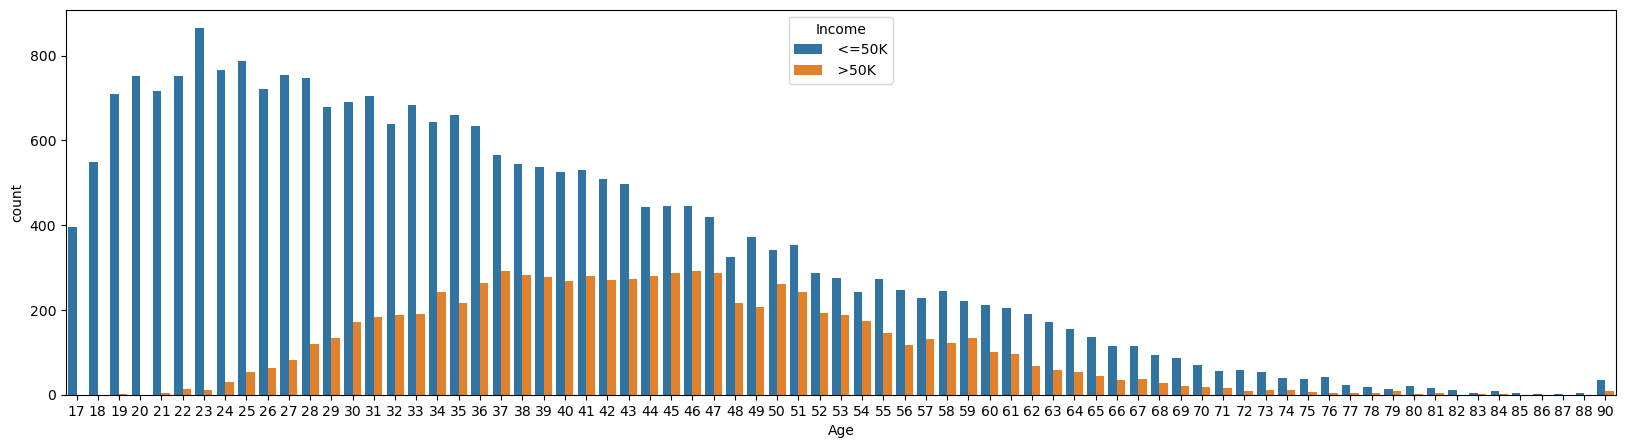

In [27]:
plt.figure(figsize=(20,5))
sns.countplot(x='Age',hue='Income',data=data)
plt.show()

- We can see, maximum people are having less 50K income.
- 17 to 40 at this age group people have less 50K salary is maximum with respect to grether than 50k.
- 33 to 45 at this age group have maximum income i.e >50k

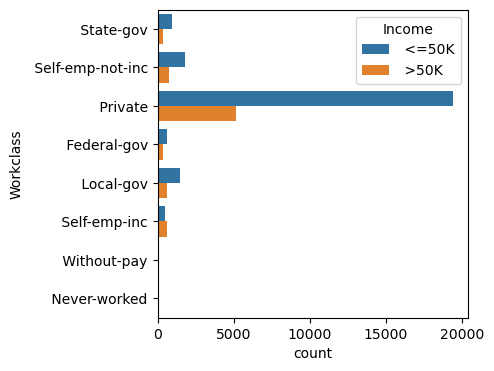

In [28]:
# Coparision between workclass and income
plt.figure(figsize=(4,4))
sns.countplot(y='Workclass',hue='Income',data=data)
plt.show()

- In private workclass most of the people(59.48%) earn <=50k.
- self-emp-inc workclass is only where more people earn >50k.
- In Federal-gov workclass nearly more than half of the people earn >50k.

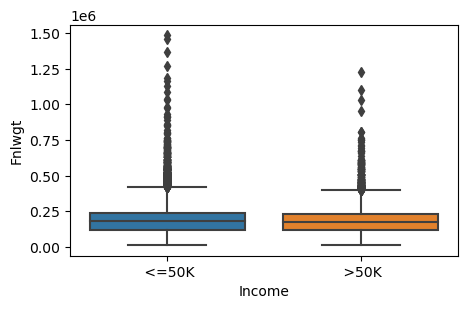

In [29]:
# Comparision between Income and Final Weight
plt.figure(figsize=(5,3))
sns.boxplot(x="Income", y="Fnlwgt", data=data)
plt.show()

- We can see that the boxplot for final weight w.r.t income groups is similar except the number of outliers in income group who earns <=50k is more.

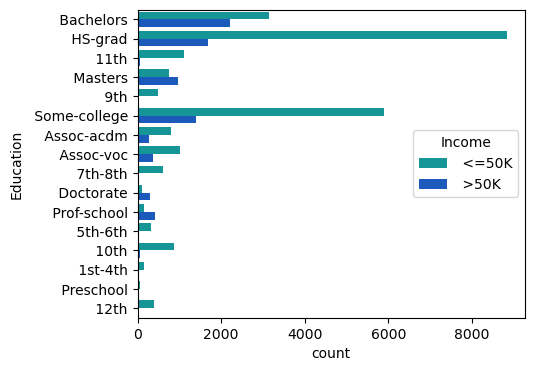

In [30]:
# comparison of education based on Income
plt.figure(figsize=(5,4))
sns.countplot(y='Education',hue='Income',data=data, palette='winter_r')
plt.show()

- We can see, High grade education has maximum <50K income folowed by Some college.
- Bachelors degree holder are having maximum >50K income followed by Hd Grade.
- These are prof-school, masters and doctorate.
- We can also infer that higher eduction may provide better earnings.

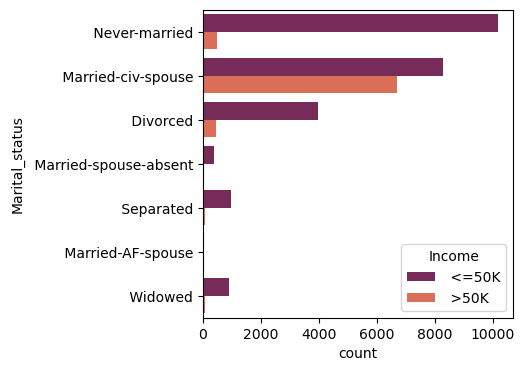

In [31]:
# comparision of marital status based on income
plt.figure(figsize=(4,4))
sns.countplot(y='Marital_status',data=data, hue='Income',palette='rocket')
plt.show()

- We can see, Never_married people are having less 50K income followed by married_civ_spouse.
- Married_AF_spouse are having lowest <50K income. ie.e income is lowest in married_Af_spouse.
- Maried couple are having maximum >50K income.

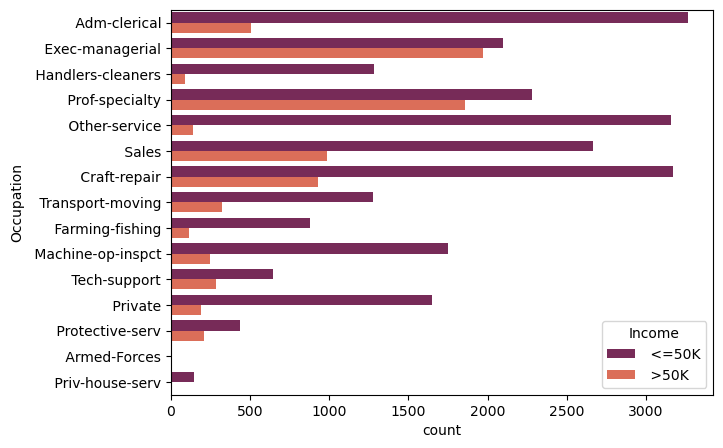

In [32]:
# comparision of occupation based on income
plt.figure(figsize=(7,5))
sns.countplot(y='Occupation',data=data, hue='Income',palette='rocket')
plt.show()

- We can see, ADM_clearical doing occupation are maximum people. They have <50K income maximum followed by Other service.
- Executive managerial are having maximum >50K income followed by pro-speciality.
- Armed Forces doing people are having very low income.

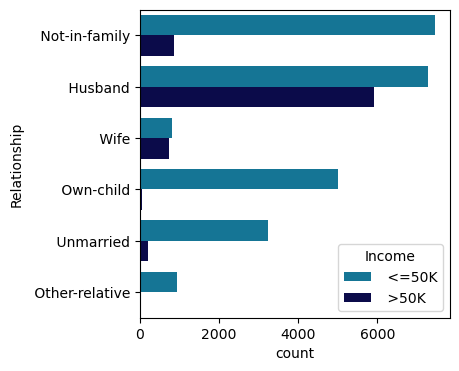

In [33]:
# Comparision of relationship based on income
plt.figure(figsize=(4,4))
sns.countplot(y='Relationship',data=data, hue='Income',palette='ocean_r')
plt.show()

- We can see, Husband are most earnig are >50K income followed by Not-in-family.
- Not-in-family are having highest <50K income.
- There is huge difference between the percentage of fall either groups except for "husband" and "wife".

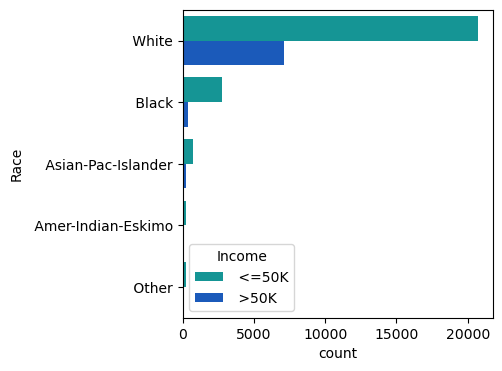

In [34]:
# Comparision of Race based on income
plt.figure(figsize=(4,4))
sns.countplot(y='Race',data=data, hue='Income',palette='winter_r')
plt.show()

- We can see, disparity in income. White people are having maximum income than other.

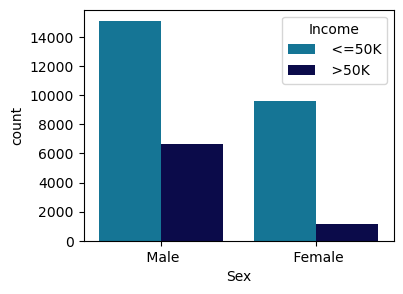

In [35]:
# comparison of Sex based on income
plt.figure(figsize=(4,3))
sns.countplot(x='Sex',data=data,hue='Income',palette='ocean_r')
plt.show()

- We can see, Male are having maximum >50K income then female.
- For country growth women participantion in labour force need to high.

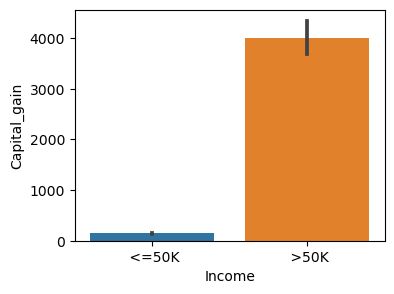

In [36]:
# comparison of capital gain based on income
plt.figure(figsize=(4,3))
sns.barplot(x='Income',y='Capital_gain',data=data)
plt.show()

- We can see, >50K are having maximum capital_gain.
- Very low capital gain <50K income.

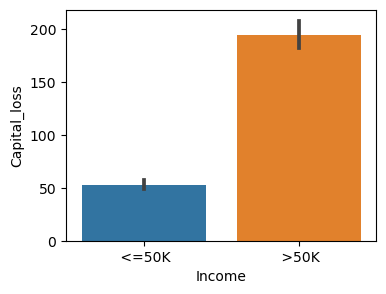

In [37]:
# comparison of capital loss based on income
plt.figure(figsize=(4,3))
sns.barplot(x='Income',y='Capital_loss',data=data)
plt.show()

-  A  >50K are having maximum capital loss. Becouse it has maximum capital gain due to this thier capital loss also high.
- <50K are having low capital loss becouse it has very low capital gain.

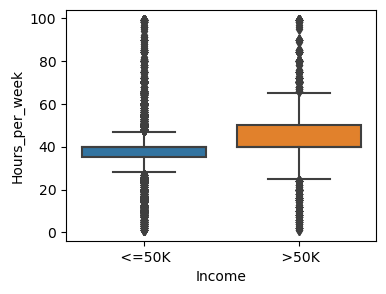

In [38]:
# comparison of hour per week based on income
plt.figure(figsize=(4,3))
sns.boxplot(x="Income", y="Hours_per_week", data=data)
plt.show()

- Income group who earns >50k has spend ~44 "hours-per-week".(long hours)
- Income group who earns <=50k has spend ~37 "hours-per-week".

## 3.3 Multivariate Analysis

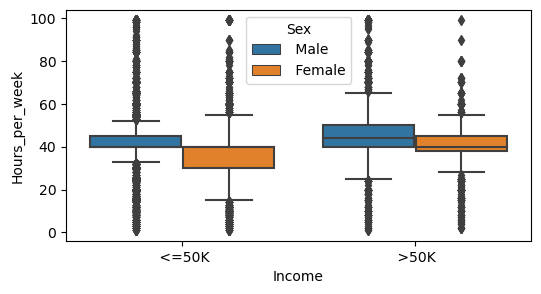

In [39]:
# Multivariate Analysis between "income", "hours-per-week", "gender"
plt.figure(figsize=(6,3))
sns.boxplot(x='Income',y ='Hours_per_week', hue='Sex',data=data)
plt.show()


- The median "hours-per-week" for females is lower than the males in the Income group who earns <=50k.
- Females have more flexible working hours per week in the income groups who earns <=50k.
- Males have more flexible working hours per week in the income groups who earns <=50k

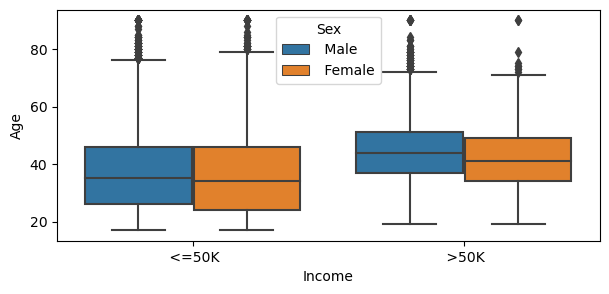

In [40]:
# Multivariate analysis between "income", "age", "gender"
plt.figure(figsize=(7,3))
sns.boxplot(x="Income", y="Age",hue="Sex",data=data)
plt.show()

- Mean "age" of Females who earn less than 50k has very minute difference than the Mean "age" of males who earn less than 50k.
- But the Mean "age" of Females who earn greater than 50k has age difference of 2-3years than the Mean "age" of males who earn greater than 50k.

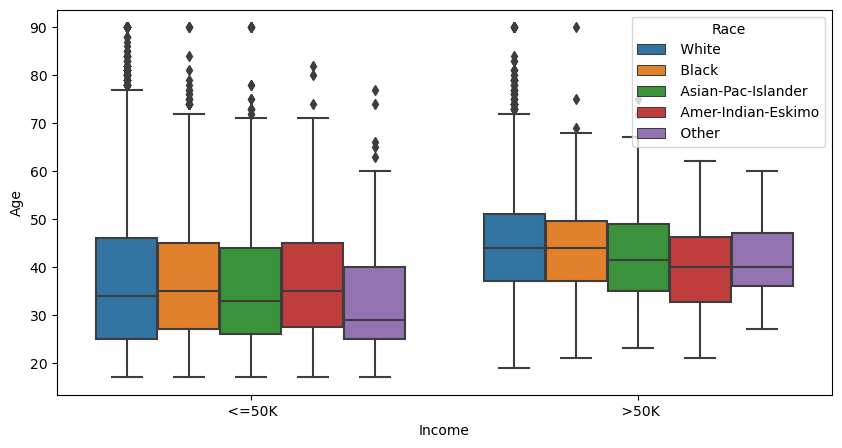

In [41]:
# Multivariate analysis between "income", "age", "race"
plt.figure(figsize=(10,5))
sns.boxplot(x="Income", y="Age",hue="Race",data=data)
plt.show()

- The mean "age" for other race is lower than the other race i.e.white, black etc in the Income group who earns <=50k.
- We can see, Low income i.e.<50K has lower age where in high income i.e. >50K has higher age.

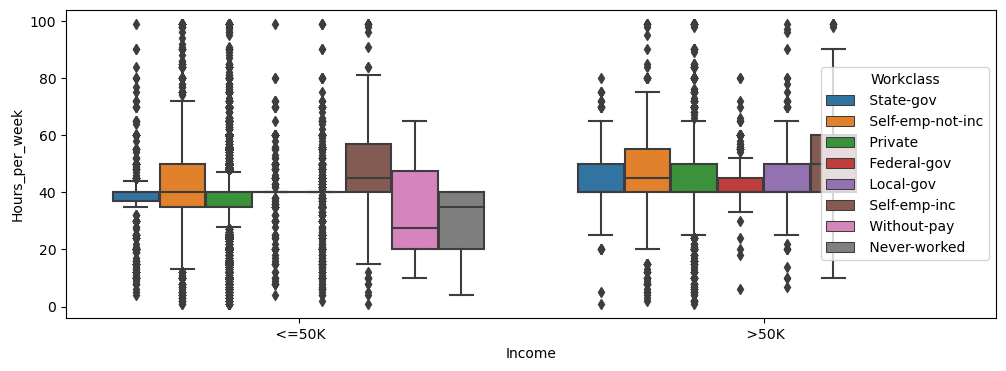

In [42]:
# Multivariate Analysis between "income", "hours-per-week", "workclass"
plt.figure(figsize=(12,4))
sns.boxplot(x='Income',y ='Hours_per_week', hue='Workclass',data=data)
plt.show()

- Self-emp-inc has maximum hours of working in week in both class i.e. <50K and >50K.
- Whereas Without-Pay and Never-worked look like a same class so I considered them No worked workclass. In this workclass has lowest income becouse they have low working hour.
- Main observation is If spend maximum hour of week then you will have maximum income.

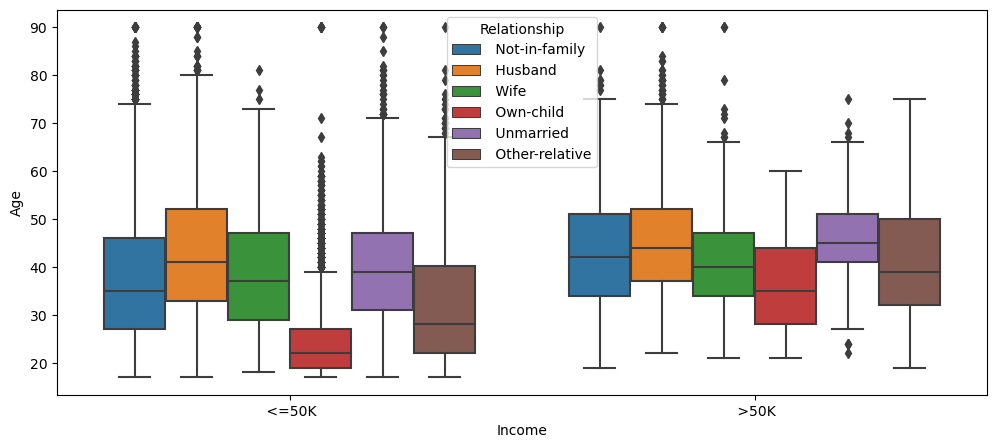

In [43]:
# Multivariate analysis between "income", "age", "relationship"
plt.figure(figsize=(12,5))
sns.boxplot(x="Income", y="Age",hue="Relationship",data=data)
plt.show()

- We can see, Husband has median age ~41 years in <50K whereas in same class Own child has ~22 year of age.
- But in >50K income, Husband and wife both are having nearly 43 and 39 years.

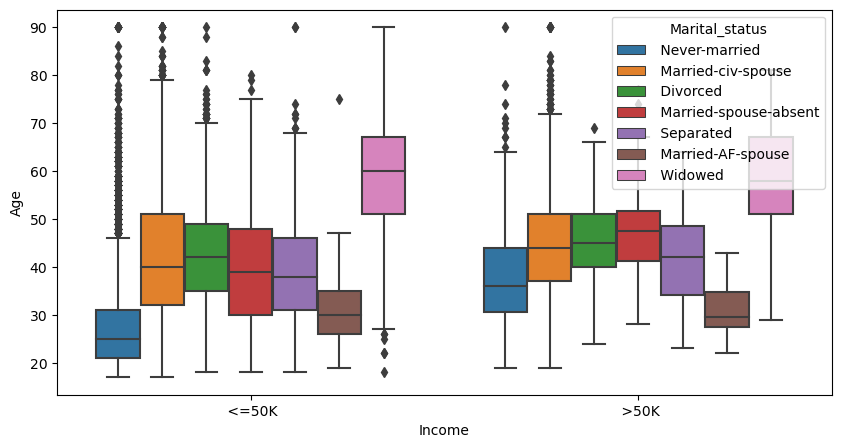

In [44]:
# Multivariate analysis between "income", "age", "marital_status"
plt.figure(figsize=(10,5))
sns.boxplot(x="Income", y="Age",hue="Marital_status",data=data)
plt.show()

- In a <50K income, Widowed has median age nearly 60 years, similarly, In >50K income widowed has median age 58 year. It means that, both income group they have nearly 58 to 60 year of age.
- Never-married has median age25 in <50K income group whereas in >50K income group has 35 year of age.

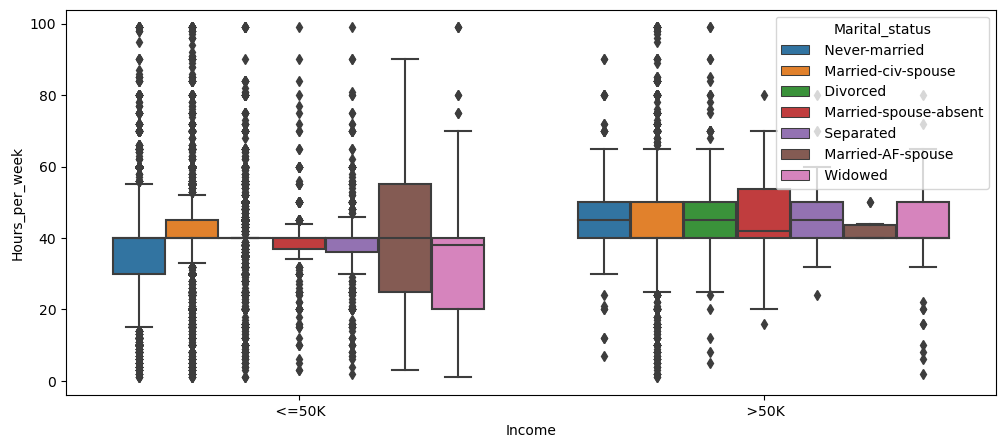

In [45]:
# Multivariate Analysis between "income", "hours-per-week", "Marital_status"
plt.figure(figsize=(12,5))
sns.boxplot(x='Income',y ='Hours_per_week', hue='Marital_status',data=data)
plt.show()

- In <50K income group, median hour in week is nearly very close for all catergories. Like marries_AF-spouse are median hour of week 40 in <50K group whereas in >50K group 42 median hour of weeek.
- We can observed here is that high income group i.e. >50K where all are spending more time then <50K group.

## 4. Encoding of DataFrame

Encoding is technique where categorical data converted into appropriate values so we can feed the data in machine learning model .


In [46]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [47]:
# importing LabelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

Here I used LabelEncoder for encoding the categorical variable because in our dataset most of the features are categorical, if I used one hot encoding it will have good performance but sometime model getting overfitting.
- For avoiding this I used LabelEncoder. It simply assign a number to that category.

In [48]:
# store all categorical variable in df_cols
# call them one by one and apply LabelEncoder to fill appropriate value
df_cols=("Workclass","Education","Marital_status","Occupation","Relationship","Race","Sex","Native_country","Income")  
for i in df_cols:
    data[i]=le.fit_transform(data[i])

In [49]:
# See categorical variables are encoded
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,39,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,39,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,39,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,39,0
4,28,3,338409,9,13,2,10,5,2,0,0,0,40,4,0


## 5. Describe the Dataset

In [50]:
# Describe the data for getting all statistical values of the features
data.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.094438,1.897784e+05,10.298210,10.080679,2.611836,6.475477,1.446362,3.665858,0.669205,1077.648844,87.303830,40.437456,37.217162,0.240810
std,13.640433,1.107194,1.055500e+05,3.870264,2.572720,1.506222,4.357104,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,6.328375,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178270e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,3.000000,1.783560e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,3.000000,2.370510e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,7.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


### Outcome of describe of datasets:
- Difference between 75% and max in Capital_gain and Capital_loss is high, columns is considerable indicating presence of outliers.
- 25%, 50% quantile, in this quantile values is 0 in Capital_gain and capital_loss.

## 6. Correlation of the features with target column

In [51]:
# getting correlation values of all features
data.corr()['Income'].sort_values()

Relationship     -0.250918
Marital_status   -0.199307
Fnlwgt           -0.009463
Workclass         0.002693
Native_country    0.023078
Occupation        0.048315
Race              0.071846
Education         0.079317
Capital_loss      0.150526
Sex               0.215980
Capital_gain      0.223329
Hours_per_week    0.229689
Age               0.234037
Education_num     0.335154
Income            1.000000
Name: Income, dtype: float64

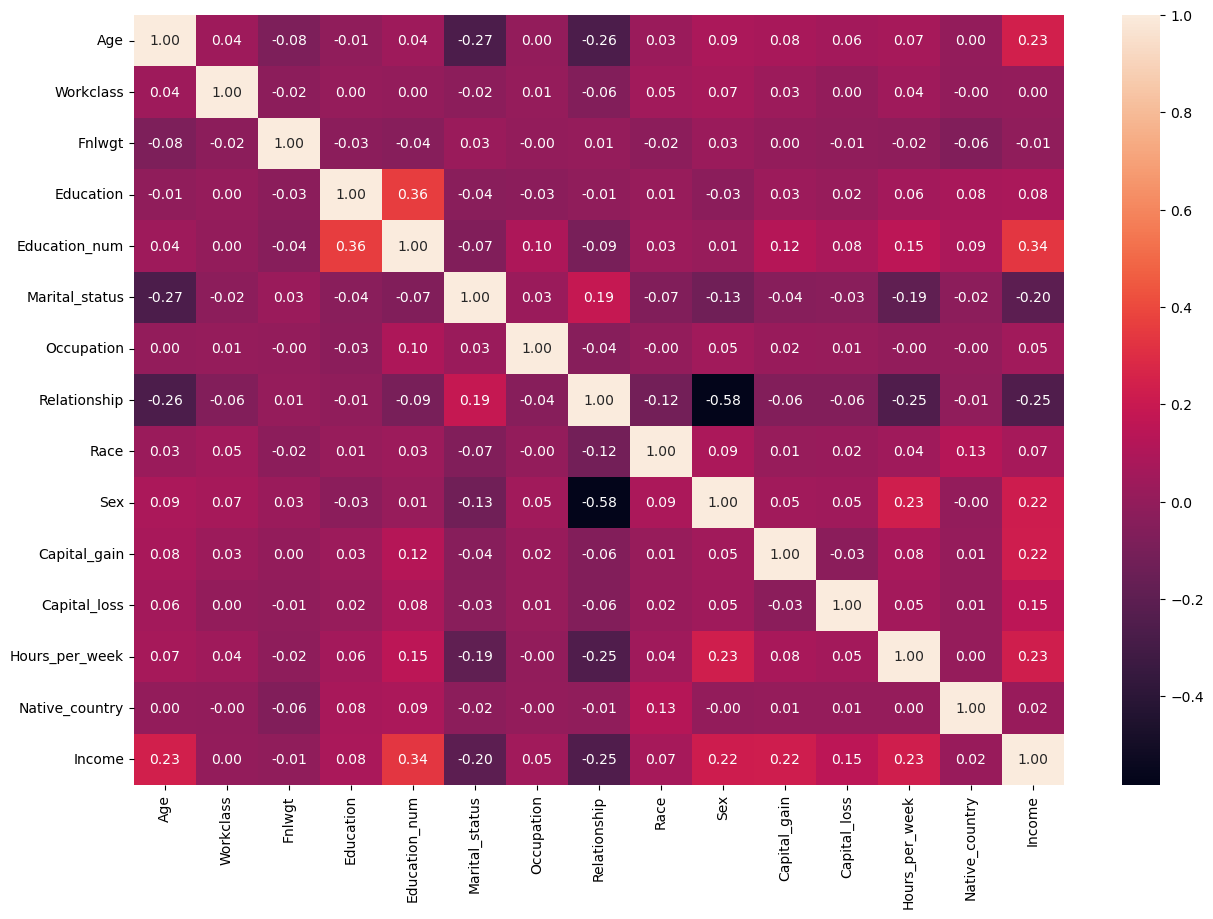

In [52]:
# plot the correlation matrix with heatmap
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, fmt ='.2f')
plt.show()

### Outcome of Correlation
- Age has 23% positive correlation with target column.
- Workclass has 0% positive correlation with target column.
- Education_num has 35% positve correlation with target column.
- Marital_status has 20% negative correlation with target column.
- Relationship has 25% negative correlation with target columns.
- Race has 7% positive correlation with target column.
- Sex has 22% positive correlation with target column.
- Capital_gain has 22% positive correlation with target column.
- Capital_loss has 15% positve correlation with target column.
- Hour_per_week has 23% positive correlation with target column.

## 7. Visualizing correlation of feature columns with label column.

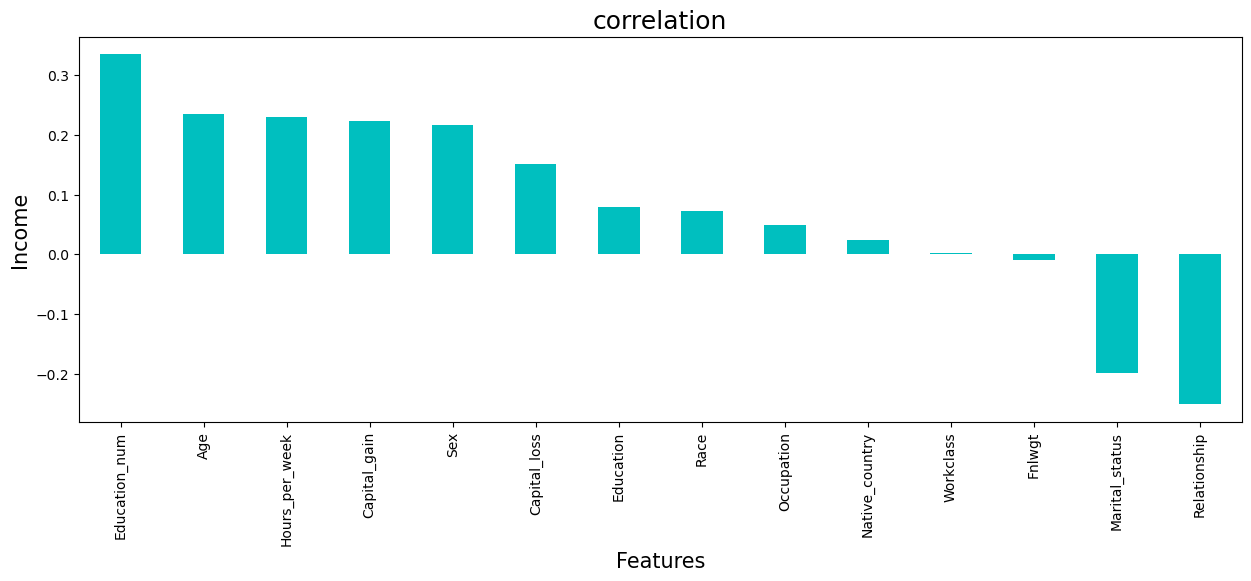

In [53]:
plt.figure(figsize = (15,5))
data.corr()['Income'].sort_values(ascending = False).drop(['Income']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Income',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

- It is observed that Education_num, Age and Hour_per_week have the highest positive correlation with Income.
- While Relationship and Marital_status have the highest negative correlation with Income.

## 8. Checking Distribution of data

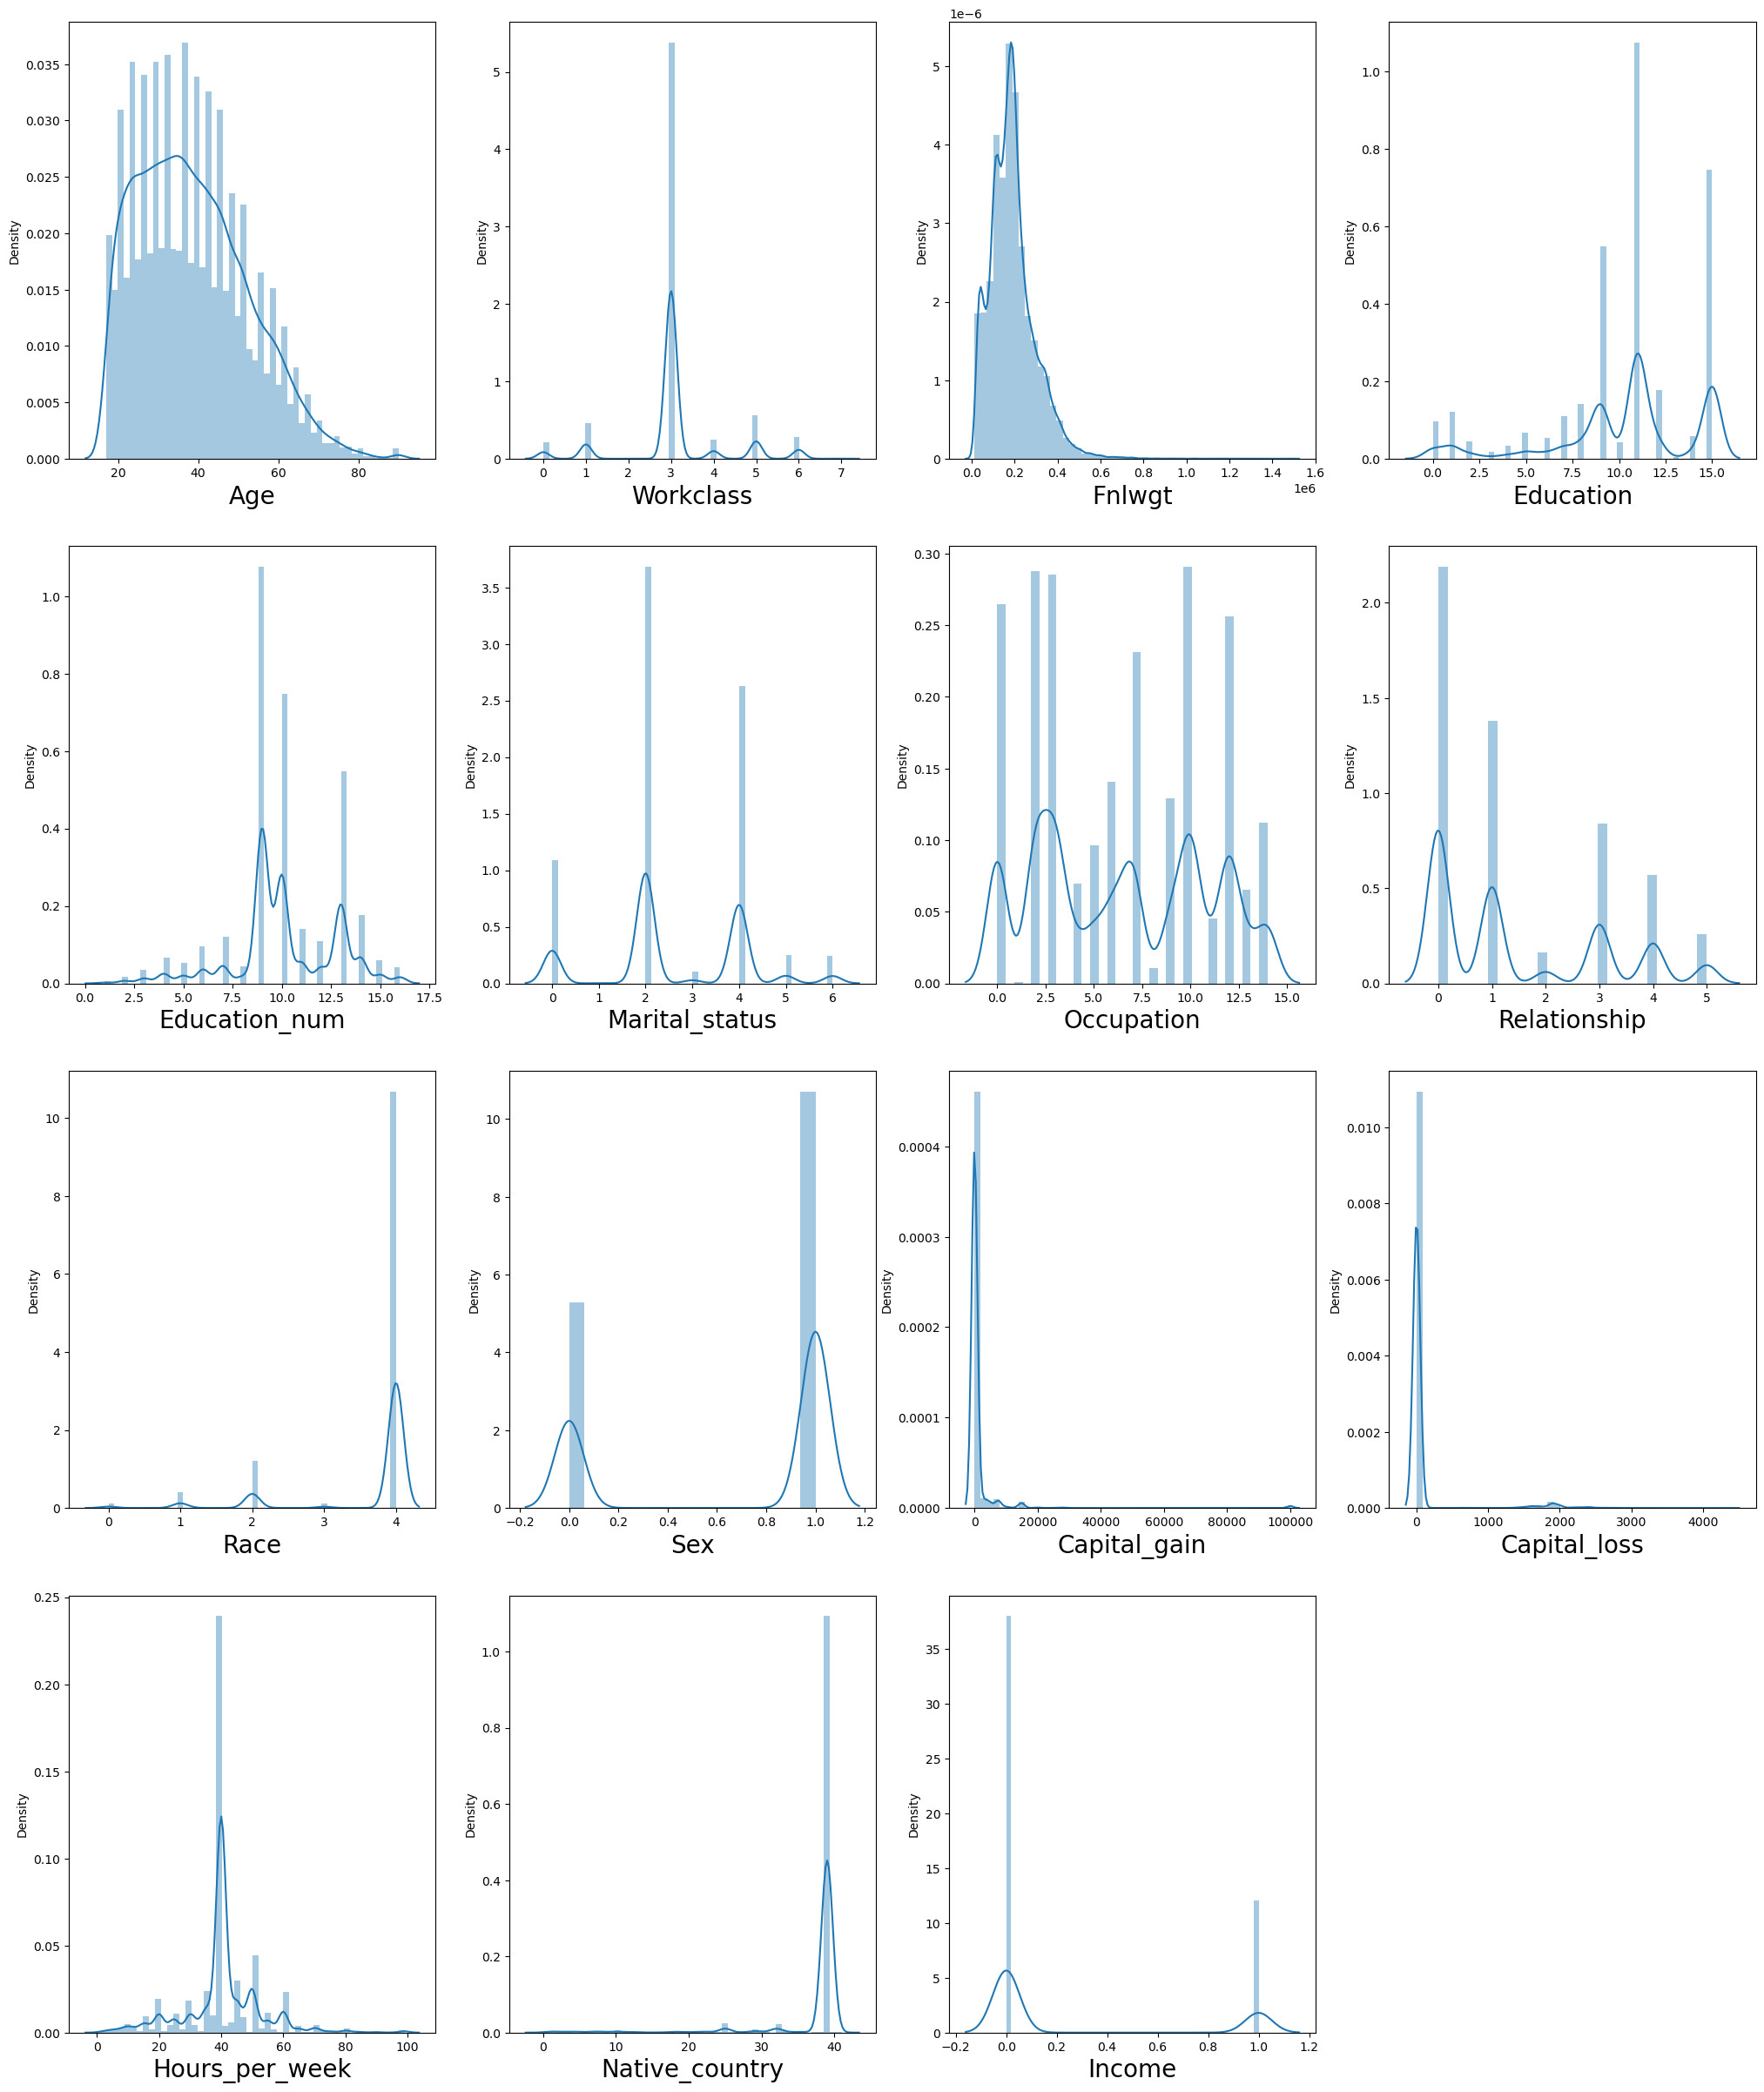

In [54]:
plt.figure(figsize=(25,30))               # gives figsize 
plotnumber = 1

for column in data:                       # apply for loop for iterating feature one by one
    if plotnumber <=16:                   # give the condition it plot 16 displot
        ax = plt.subplot(4,4,plotnumber)  # number of plot plot so give it subplot number
        sns.distplot(data[column])        # plot distplot by using seaborn
        plt.xlabel(column, fontsize=20)   # gives xlavel and fontsize
    plotnumber +=1
plt.show()

- We can see, all categorical data have skewness. But we check distribution only for continuous data
- Age, Capital_gain and capital_loss have positively skewed.
- Hour_per_week has little normaly distributed.

## 9. Checking Outliers

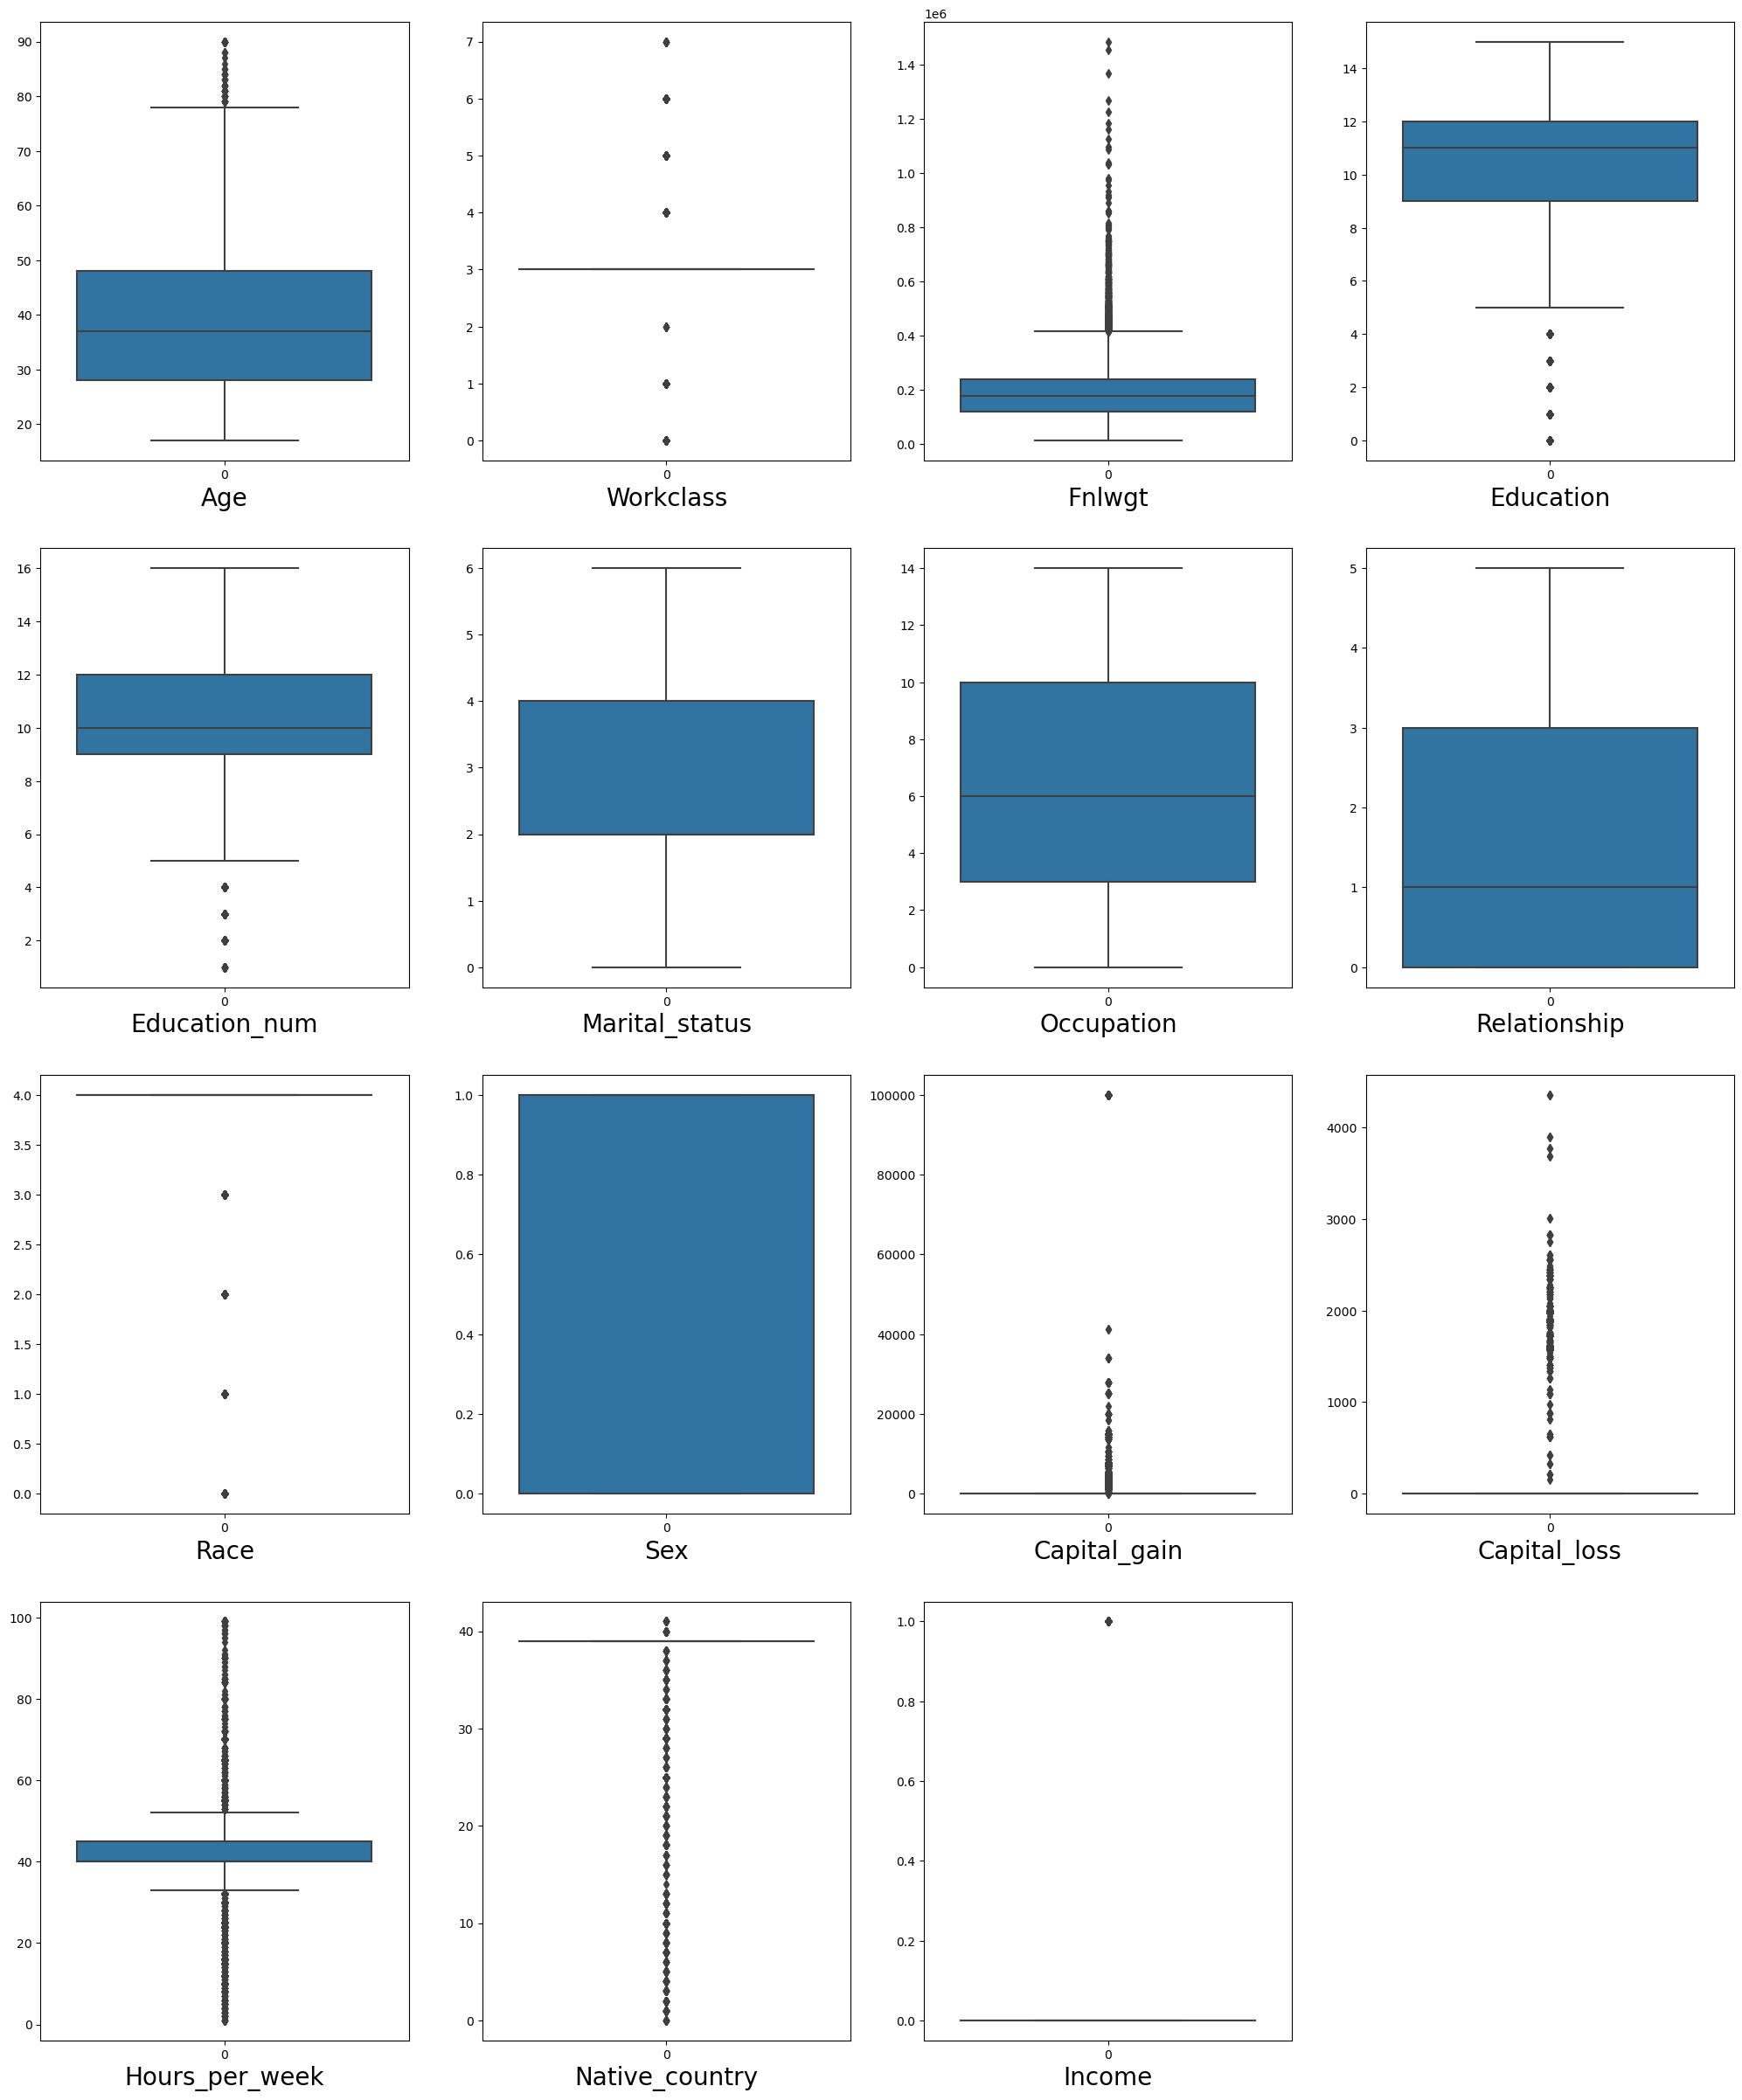

In [55]:
# Check outlier by using boxplot
plt.figure(figsize=(25,30))
plotnumber = 1

for column in data:
    if plotnumber <=16:
        plt.subplot(4,4,plotnumber)
        ax = sns.boxplot(data=data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

- We check the outliers for continuos data. 
- Almost all continuous features are having outliers.

## 9.1 Removing Outliers

I used Zscore for removing the outliers from the data. Zscore does whichever the data more than 3 standard deviation of mean its consider as outliers and I removed it.

In [65]:
# import zscore 
from scipy.stats import zscore

z_score = zscore(data[['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']])
abs_z_score = np.abs(z_score)    # Apply the formula and get the scaled data

filtering_entry = (abs_z_score  < 3).all(axis=1) # if the data more than 3 standard deviation is outliers

df = data[filtering_entry] # create new dataset after removing the outliers

In [66]:
df.shape

(30029, 15)

In [67]:
data.shape

(32561, 15)

### 9.2 Percentage of data loss

In [68]:
data_loss = ((32560 - 30028)/32560*100)
print(data_loss,'%')

7.776412776412776 %


## 10. Checking Multicollinearity

In [69]:
# Split the data into features and lable
x = df.drop(columns=['Income'],axis=1)
y = df['Income']

In [70]:
# import StandardScaler and VIF
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
# Sclaed the data by Using Standard Scaler because it works well if the outliers present
scaler= StandardScaler()
scaled_X = scaler.fit_transform(x)

- Feature Scalling are used convert features in particular range because if we feed the data without scalling. model can give imporantce of those feature whose having maximum weight. So avoiding this we used scaling.
- I used StandardScaler it convert the data in a such way that their mean is 0 and standard of deviation 1. And it good if we have outlirs so I used it.

In [72]:
# Create new dataframe
vif = pd.DataFrame()

In [73]:

vif["Features"] = x.columns   # new dataframe contains features
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
vif

,Features,vif
0,Age,1.178057
1,Workclass,1.008022
2,Fnlwgt,1.013941
3,Education,1.161617
4,Education_num,1.225988
5,Marital_status,1.137251
6,Occupation,1.018686
7,Relationship,1.670068
8,Race,1.034499
9,Sex,1.549244


- I used threshold as 5 because it middle one. Mostly we take threshold from 2.5 to 10.
- If VIF > 5, It means multicollinearity is present.
- MultiCollinearity does not exists in dataset, Based on ANOVA F scores.

## 11. Selecting Kbest Features

Now I want to select best feature that are more correalted to label for this I used Select KBest method for features selection.

In [74]:
# import SelectKBest and f_classif
from sklearn.feature_selection import SelectKBest, f_classif

In [75]:
bestfeat = SelectKBest(score_func = f_classif, k = 'all') # select all feature from features
fit = bestfeat.fit(x,y)                                   # fit the data i.e.feature and label
dfscores = pd.DataFrame(fit.scores_)                      # create two data frame
dfcolumns = pd.DataFrame(x.columns)

In [76]:
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)  # create dataframe where store fit score
dfcolumns = pd.DataFrame(x.columns)   # create dataframe where store columns
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1) # concate the data frame
featureScores.columns = ['Feature', 'Score'] # name the column
print(featureScores.nlargest(15,'Score'))

           Feature        Score
10    Capital_gain  3998.087344
4    Education_num  3354.796931
7     Relationship  1914.823671
0              Age  1780.207074
12  Hours_per_week  1685.129608
9              Sex  1369.950721
5   Marital_status  1182.473204
3        Education   168.581558
8             Race   156.261672
6       Occupation    56.963458
13  Native_country    14.739974
11    Capital_loss     8.135114
2           Fnlwgt     3.404730
1        Workclass     1.448140


- We can see feature with their score, most of the feature are correalted to label.
- I an not drop any feature because features selecting is used when we have more numbers of columns in data but we have only 14 columns or features that are quite enough so I am not removing any feature from data.

### 11.1 Data Before removing Skewness

In [77]:
data.skew()

Age                0.558743
Workclass          0.076469
Fnlwgt             1.446980
Education         -0.934042
Education_num     -0.311676
Marital_status    -0.013508
Occupation         0.090081
Relationship       0.786818
Race              -2.435386
Sex               -0.719293
Capital_gain      11.953848
Capital_loss       4.594629
Hours_per_week     0.227643
Native_country    -4.058232
Income             1.212430
dtype: float64

- Outcome of the skewness: Skewness threshold is taken is +/-0.65.
- Almost all continuous data are having skewness.

### 11.2 Data After Removing Skewness

- I used power transformation for removing the skewness from the data. 
- In which I used 'yeo-johnson' because This transformation is also having the ability to make the distribution more symmetric.

In [78]:
# import power transform
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson') # transform the features by using 'yeo-johnson' method

In [79]:
# create dataframe after removing skewness
trans = pd.DataFrame(x)

In [80]:
# showing the skewwness after removing skewness
trans.skew()

0     -0.017302
1      0.225619
2     -0.034896
3     -0.314127
4      0.028258
5     -0.126047
6     -0.213775
7      0.104745
8     -2.001601
9     -0.681807
10     3.081766
11    24.953316
12     0.108317
13    -2.643824
dtype: float64

In [81]:
# Feature scalling
x = scaler.fit_transform(trans)

- Feature Scalling are used convert features in particular range because if we feed the data without scalling. model can give imporantce of those feature whose having maximum weight. So avoiding this we used scaling.
- I used StandardScaler it convert the data in a such way that their mean is 0 and standard of deviation 1. And it good if we have outlirs so I used it.

In [82]:
x

array([[ 0.20064235,  2.6979693 , -1.20345494, ..., -0.04001267,
        -0.03484078,  0.32946828],
       [ 0.92475927,  1.75806744, -1.11617016, ..., -0.04001267,
        -2.21606379,  0.32946828],
       [ 0.12694902, -0.08811742,  0.42222309, ..., -0.04001267,
        -0.03484078,  0.32946828],
       ...,
       [ 1.37416864, -0.08811742, -0.23881548, ..., -0.04001267,
        -0.03484078,  0.32946828],
       [-1.33750374, -0.08811742,  0.28407075, ..., -0.04001267,
        -1.72002803,  0.32946828],
       [ 1.04227968,  0.82871245,  1.07107405, ..., -0.04001267,
        -0.03484078,  0.32946828]])

## 11.3 Balancing Datasaet

- Balancing the target variable using oversampling:

In [83]:
#Checking the value count of target column
y.value_counts()

0    23370
1     6659
Name: Income, dtype: int64

- See data is imbalanced so we need to balanced it for avoiding the biasness in our result. 
- For this I used SMOTE is a oversampling technique in which it enhancing the minority observation.

In [84]:
# Import SMOTE
from imblearn.over_sampling import SMOTE as sm

smt_x,smt_y = sm().fit_resample(x,y) #

In [85]:
smt_y.value_counts()

0    23370
1    23370
Name: Income, dtype: int64

# 12. Building Machine Learning Model

In [87]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [88]:
# I create function that can used many time
def metric_score(clf, x_train_ns,x_test,y_train_ns,y_test, train=True):  # Pass ML algorithms, train and test data
    if train:   # if the condition i.e train = true loop come this tab        
        y_pred = clf.predict(x_train_ns)

        print("\n========================== Train Result=============================")

        print(f"Accuracy Score: {accuracy_score(y_train_ns, y_pred) * 100:.2f}%") # print the accuracy for train

    
    elif train==False:
        pred = clf.predict(x_test)
        
        print("\n==========================Test Result=======================")
        print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%") # print accuracy
        
        print("\n \n Test Classification Report \n", classification_report(y_test, pred, digits=2)) #print classification report
        
        print('\n Confusion Matrix: \n',confusion_matrix(y_test,pred)) # print confusion matrix
    

## 12.1 Random Forest Classifier
- As in task said that I can used only two algorithms.
- Random forest is bagging technique in which it reduces the high variance to make genralize model. 
- I used this because most of the time Random forest algorims gives very good accuracy. And overfitting not in random forest so it make model more generalize.

### Finding Best random State

- Random state is increasing the performance of the model so that finding appropriate random state is very important.
- I find the random state for both model diffrently.

In [89]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train, y_train) # train the model
    pred = rf.predict(x_test) # pred the xtest
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.9086435601198117 on Random State 315


In [91]:
# split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=315)

In [92]:
rf = RandomForestClassifier() # coll random forest
rf.fit(x_train,y_train) # train the model 

metric_score(rf,x_train,x_test,y_train, y_test, train=True) # getting accuracy for train data

metric_score(rf,x_train,x_test,y_train, y_test, train=False) # Accuracy for test data


========================== Train Result=============================
Accuracy Score: 99.99%

==========================Test Result=======================
Accuracy Score: 90.66%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.90      0.91      7078
           1       0.90      0.91      0.91      6944

    accuracy                           0.91     14022
   macro avg       0.91      0.91      0.91     14022
weighted avg       0.91      0.91      0.91     14022


 Confusion Matrix: 
 [[6361  717]
 [ 592 6352]]


## 12.1.1 Which accuracy metric used ?

- Here I used "Accuracy" as metric to select model, because accuracy will used when we have balanced the data set. In this I balanced data so I can used it as accuracy metric to considering  or selecting the model.
- If I used imbalanced data that time we can used "Precision", 'Recall" and "F1 score".
- "Precison" used whenever your False Positive much important then we can used it. In this problem we can used it if data is imabalnced. 
- "Recall" used whenever your False Negative much more important then used Recall.
- In some problem FP and FN both are very very important then we can used "F1 Score".

## 12.1.2 Cross - Validation for preventing overffiting. 
- As we know that cross validation is used to estimate the performance of ML model. It is used to protect against overfitting in a predictive model.
- So I used the cross validation for preventing the Overfitting.

In [93]:
pred_rf = rf.predict(x_test) # predict test 
accu = accuracy_score(y_test,pred_rf)

In [94]:
for j in range(4,10): # give range for CV and iterating it
    cross = cross_val_score(rf,x,y,cv=j) # pass the model,feature, label with repective CV values which take it from range
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100) # print Cross validatiob score
    print('accuracy_score is:-',accu*100)        # print Accuracy score
    print('\n')

At cv:- 4
Cross validation score is:- 85.34417601643189
accuracy_score is:- 90.66466980459278


At cv:- 5
Cross validation score is:- 85.52399473964837
accuracy_score is:- 90.66466980459278


At cv:- 6
Cross validation score is:- 85.40745092903367
accuracy_score is:- 90.66466980459278


At cv:- 7
Cross validation score is:- 85.44739010115555
accuracy_score is:- 90.66466980459278


At cv:- 8
Cross validation score is:- 85.4141336194053
accuracy_score is:- 90.66466980459278


At cv:- 9
Cross validation score is:- 85.54066046932705
accuracy_score is:- 90.66466980459278




In [95]:
# selcting best CV values from above 
lsscore_selected = cross_val_score(rf,x,y,cv=9).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.8548738374199253 
The accuracy score is:  0.9066466980459278


## 12.2 Gradient Boosting Classifier

- GBDT get a more accurate result than others model and they are excellent with unbalanced data, making their usage a no-brainee. 
- I used GBDT because it a boosting algorithm if the model are having high bias then it can handle and give good accuracy. It reduced the bias to make generalize model.

### Finding Best Random State

In [96]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    gbc=GradientBoostingClassifier()
    gbc.fit(x_train, y_train)
    pred = gbc.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.8722721437740694 on Random State 708


In [97]:
# split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=708)

In [98]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

metric_score(gbc,x_train,x_test,y_train, y_test, train=True)

metric_score(gbc,x_train,x_test,y_train, y_test, train=False)


========================== Train Result=============================
Accuracy Score: 86.68%

==========================Test Result=======================
Accuracy Score: 87.23%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.84      0.87      7040
           1       0.85      0.90      0.88      6982

    accuracy                           0.87     14022
   macro avg       0.87      0.87      0.87     14022
weighted avg       0.87      0.87      0.87     14022


 Confusion Matrix: 
 [[5939 1101]
 [ 690 6292]]


## 12.2.1 Cross - validation For GradientBoosting Classifier

In [99]:
pred_gbc = gbc.predict(x_test)
accu = accuracy_score(y_test,pred_gbc)

In [101]:
for j in range(4,10):
    cross = cross_val_score(gbc,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 86.43646013853595
accuracy_score is:- 87.22721437740694


At cv:- 5
Cross validation score is:- 86.45310005010256
accuracy_score is:- 87.22721437740694


At cv:- 6
Cross validation score is:- 86.4264525775317
accuracy_score is:- 87.22721437740694


At cv:- 7
Cross validation score is:- 86.45641915401765
accuracy_score is:- 87.22721437740694


At cv:- 8
Cross validation score is:- 86.39650701743702
accuracy_score is:- 87.22721437740694


At cv:- 9
Cross validation score is:- 86.39984526213811
accuracy_score is:- 87.22721437740694




In [102]:
lsscore_selected = cross_val_score(gbc,x,y,cv=5).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.8645310005010256 
The accuracy score is:  0.8722721437740694


## 13. ROC_AUC Curve

In [103]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

<Figure size 400x400 with 0 Axes>

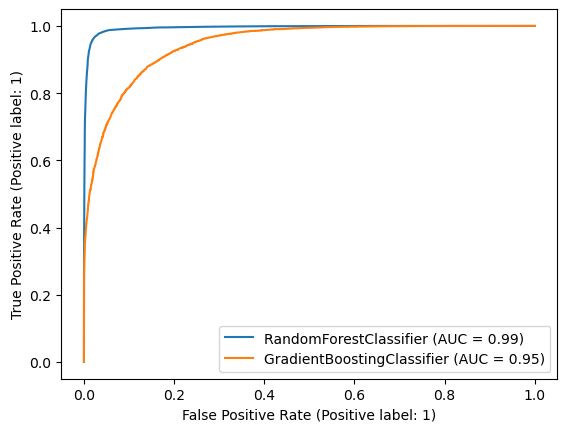

In [105]:
# AUC Curve For Training

disp = plot_roc_curve(rf,x_train,y_train)

plot_roc_curve(gbc, x_train,y_train, ax=disp.ax_)

plt.legend(prop={'size':10}, loc='lower right')

plt.show()

<Figure size 2000x1500 with 0 Axes>

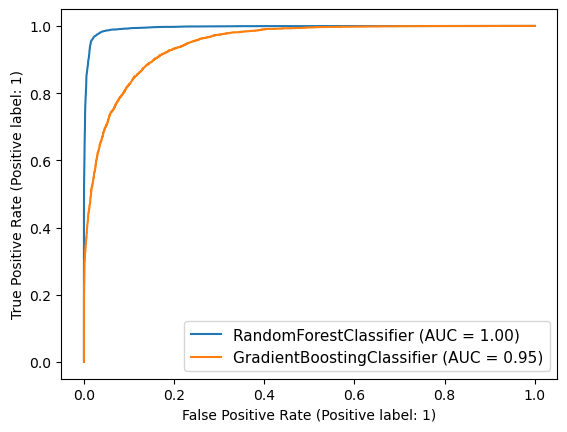

In [106]:
# AUC curve for testing

plt.figure(figsize=(20,15))

disp = plot_roc_curve(rf,x_test,y_test)

plot_roc_curve(gbc, x_test,y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')

plt.show()

## 14. Selcting the Best Model

- Based on comparing Accuracy Score results with Cross Validation results, it is determined GradientBoostingClassifier is the best model. It has least difference between accuracy score and cross validation.
- As I say before that, Cross Validation is used to preventing the oferfitting, GradientBoosting classifier has good Cross Validation Score comparing Random Forest.
- Area under the cureve also same for training and testing so that this model is more generalize than others.

## 15. Hyperparameter Tuning

#### We have two way to do 1. GridSearchCV 2 . RandomizedSearchCV
- Here I Used GridSearchCV because it does a exhaustive generation of combination of different parameters passed. Using cross validation score, GridSearchCV return the combination of hyperparameter for which the model is performing the best.

In [107]:
from sklearn.model_selection import GridSearchCV 

In [108]:
gbc =  GradientBoostingClassifier()

In [109]:
# split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=708)

In [110]:
# Pass the parameter
parameters = {
             'min_samples_split':[2,5,10],
             'min_samples_leaf':[1,3,4],
             'max_depth':[5,10,15],
             'learning_rate': [0.1,0.2,0.3],
              'n_estimators':[150,200,250],
             }

In [111]:
# Assigning to GridsearchCv
grd = GridSearchCV(gbc,param_grid=parameters)

In [112]:
# Trained the GridSearch 
grd.fit(x_train,y_train)

# Getting Best Parameter
grd.best_params_

{'learning_rate': 0.2,
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 200}

In [116]:
# Using the best prameter and tune the model
gbc = GradientBoostingClassifier(max_depth=3,min_samples_split=2, min_samples_leaf=1, n_estimators=250, learning_rate=0.25)

gbc.fit(x_train,y_train)

metric_score(gbc,x_train,x_test,y_train,y_test, train=True)  # This is for training score

metric_score(gbc,x_train,x_test,y_train,y_test, train=False) # This is for testing score


========================== Train Result=============================
Accuracy Score: 91.75%

==========================Test Result=======================
Accuracy Score: 91.03%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      7040
           1       0.92      0.90      0.91      6982

    accuracy                           0.91     14022
   macro avg       0.91      0.91      0.91     14022
weighted avg       0.91      0.91      0.91     14022


 Confusion Matrix: 
 [[6461  579]
 [ 679 6303]]


## 16. Model Save

In [117]:
import joblib
joblib.dump(gbc,"census_income_prediction.pkl")

['census_income_prediction.pkl']

## Loading The Model

In [118]:
mod=joblib.load("census_income_prediction.pkl")

## Predict class

In [119]:
print(mod.predict(x))

[0 0 0 ... 0 0 1]


In [120]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(x), 'Actual Values': y})
Prediction_accuracy.head(30)

,Predictions,Actual Values
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,1,0
6,0,0
7,1,1
8,1,1
9,1,1


## 17. Conclusion
- In this project I build two model like Random Forest Classifier and Gradient Boosting Classifier. I select Gradient Boosting Classifer because it has least difference between accuracy score and cross validation score.
- Doing hyperparameter tunig of Gradient Boosting Classifer then it gives highest Accuracy score i.e 91.0% and F1 score i.e 91.0%.

## 18. Understanding about the business problem

- The inequality of the wealth and income it major concern. Poverty is one of the reson of inequality of the wealth and income so we need address this preoblem . Goverment of diffrent countries are trying to address this provle and trying to overcome this problem by taking thire respective measure. The our aim to sove this by machine learning because by ML we identify the what are those feature whose highly affect the inquality of wealth and income.
- For this we used adult.data dataset to solve this proble.

## 19. Outcome
- This dataset not balance , i.e. 76% of them are belong to income group (who earns more than 50k) and 23.93% fall under the income group (who earns less than 50k).

- Females have more flexible working hours per week in the income groups who earns <=50k.

- Males have more flexible working hours per week in the income groups who earns >50k.

- The Median "age" of Females who earn greater than 50k has age difference of 2-3years(lower) than the Median "age" of males who earn greater than 50k.

- Generally people can be seen working for 30 hours to 40 hours per week.

- Income group who earns >50k have flexible working hours.

- For "female" earning more than 50k is rare with only 3.62% of all observations. But for male, 20.31% of all people earn more than 50k .

- self-emp-inc workclass is only where more people earn >50k(belong to income group >50K).

- People having degree doctorate,prof-school,masters are making salary more than 50K(it can be concluded that higher education means more salary).

#### Note
- This outcome are taking from "EDA" section of this project for visualization you can refers the EDA section.